# Logistic Regression Project Tutorial


Bank Marketing Campaign:

Business Understanding:

Term deposits allow banks to hold money for an specific amount of time, which allows the bank to use that money for better investments. 
The marketing campaigns for this product were based on phone calls. 
Often, more than one contact to the same client was required, in order to know if the term deposit would be or not subscribed.

Problem Description:

Portuguese bank is having a decrease in its revenue so they want to be able to identify existing clients that have a higher chance to subscribe a term deposit. 
This will allow the bank to focus marketing efforts on those clients and avoid wasting money and time on clients that will probably not subscribe, as they want to increase their revenue.

To approach this problem we will create a classification algorithm that helps predict if a client will subscribe or not a term deposit.

### Features:
- Age: (numerical)
- Job: Type of Job (categorical)
- Marital: marital status (categorical)
- Education: (categorical)
- Default: has credit in default? (categorical)
- Housing: has housing loan? (categorical)
- Loan: has personal loan? (categorical)
- contact: contact communication type (categorcial)
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numerical)
    - Important note: this output highly affects the output target (if duration = 0, then y = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Consider if you should include it or not for a realistic predictive model.
- campaign: number of contacts performed during this campaign and for this client (numerical)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 - means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numerical)
- poutcome: outcome of the previous marketing campaign (categorical)

    - Important note: this attribute has three categories: 'failure', 'success' and 'non-existent'. 86% of the data falls into 'non-existent' category.

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index- monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate: - daily indicator(numeric)
            Note:the average interbank interest rate at which European banks are prepared to lend to one another
- nr.employed: number of employees - quarterly indicator (numeric)
### Target variable:

y: has the client subscribed a term deposit?

# Step 0 - Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Setp 1 - Import and Basic Explored Data

In [4]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df=pd.read_csv(url, sep=";")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Note:
    - not null value

In [5]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29111,33,technician,married,professional.course,no,yes,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
13668,31,blue-collar,single,basic.4y,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
3461,54,retired,divorced,professional.course,no,yes,no,telephone,may,thu,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3692,43,self-employed,single,professional.course,unknown,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
17269,49,admin.,divorced,high.school,no,yes,no,cellular,jul,fri,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
39264,73,retired,married,basic.4y,no,yes,no,cellular,mar,mon,...,2,999,1,failure,-1.8,93.369,-34.8,0.646,5008.7,no
10649,57,self-employed,married,unknown,unknown,yes,no,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
31557,36,blue-collar,married,basic.9y,no,yes,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
39077,28,unemployed,single,high.school,no,yes,no,cellular,dec,mon,...,3,6,3,success,-3.0,92.713,-33.0,0.709,5023.5,no
11036,33,entrepreneur,married,university.degree,no,yes,yes,telephone,jun,wed,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no


## STEP 2 
find patterns and valuable information about relationships between features

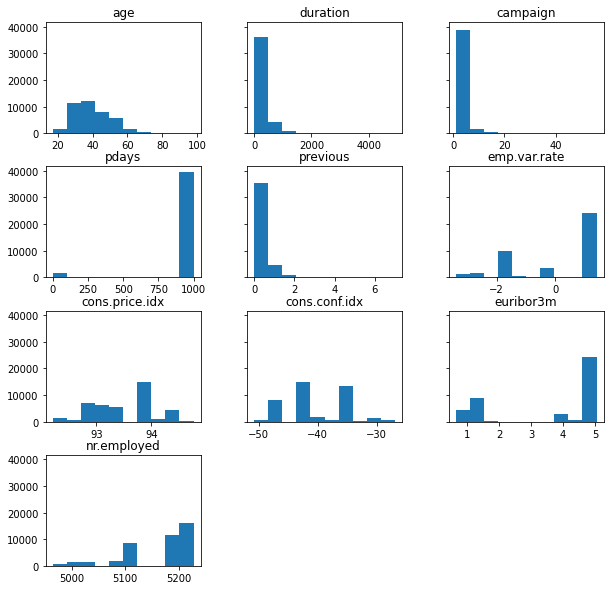

In [7]:
df.hist(bins=10,figsize=(10,10),grid=False, sharey=True);
plt.show()

In [19]:
variables = df.columns[df.dtypes == 'object'] 

11

Data distribution analysys


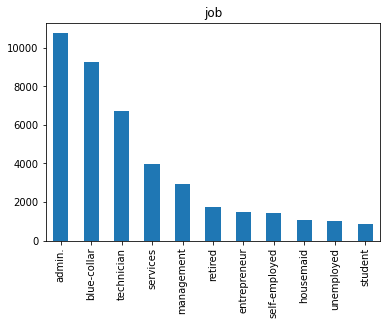

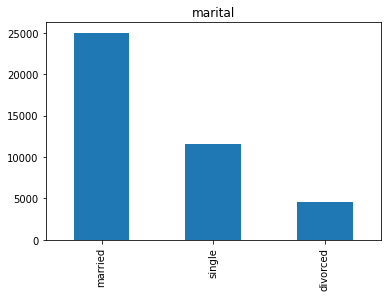

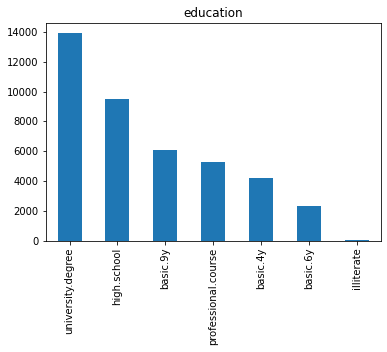

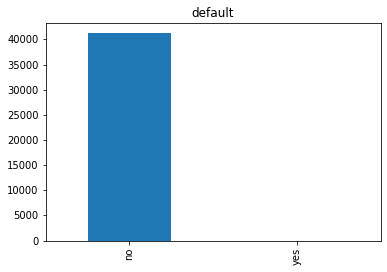

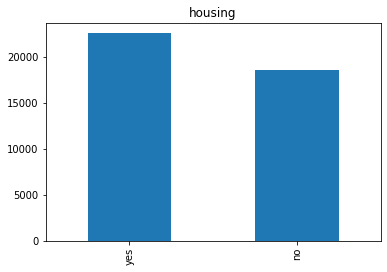

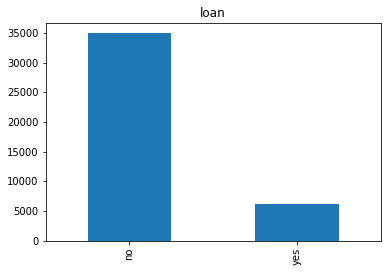

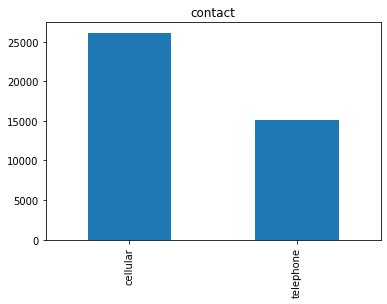

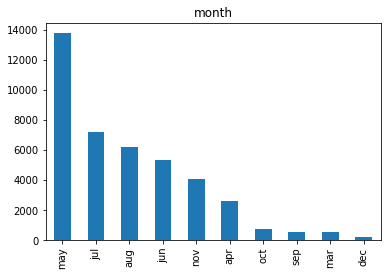

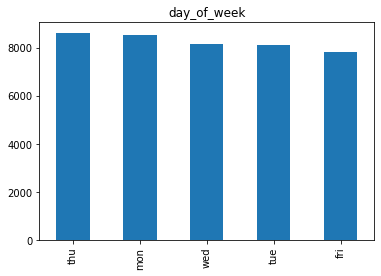

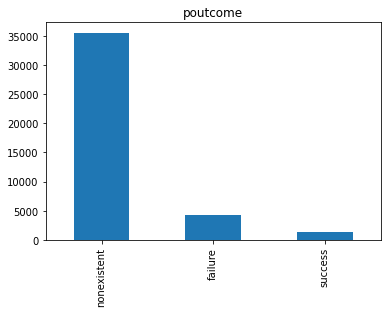

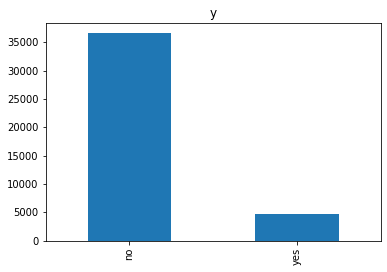

In [20]:
 # data distribution analysys
print('Data distribution analysys')
for v in variables:
    data = df.sort_values(by=[v])
    data[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

## Clean Data
### Not null, but check duplicate

In [9]:
#check the amount odf duplicated
df.duplicated(keep='first').value_counts()

False    41176
True        12
dtype: int64

In [10]:
#have duplicate, drop
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

## MISSING VALUES

### in category feature, replace unknow value to more frecuency value

In [11]:
#make change for all values
#more frecuency value is the mode
variables = df.columns[df.dtypes == 'object']

print('Change unknow in each object column')
for v in variables:
    print(f' {v} to {df[v].mode()[0]}')
    df.loc[df[v] == "unknown", v] = df[v].mode()[0]



Change unknow in each object column
 job to admin.
 marital to married
 education to university.degree
 default to no
 housing to yes
 loan to no
 contact to cellular
 month to may
 day_of_week to thu
 poutcome to nonexistent
 y to no


### In the numerical features, replace the unknown values with the mean.

In [12]:
variablesInt = df.columns[df.dtypes == 'int64']

df.describe(include=['int64'])
#df[df['Age'].fillna(df['Age'].median(), inplace=True)

,age,duration,campaign,pdays,previous
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013
std,10.42068,259.305321,2.770318,186.937102,0.494964
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [36]:
#check outlier the max is to height, than the mean
df[df['campaign'] > 40]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18728,54,admin.,married,university.degree,no,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Text(0, 0.5, 'campaign')

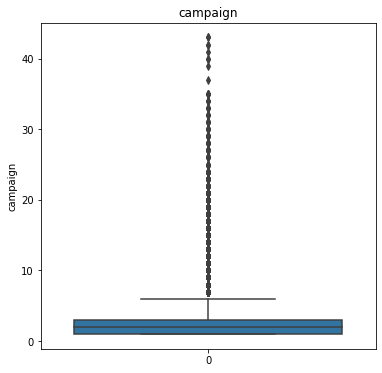

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df['campaign'])
plt.title('campaign')
plt.ylabel('campaign')

In [31]:
#drop outliers
df.drop(df[df['campaign']>45].index, inplace=True)

In [52]:
#999 - not previews contact
df['pdays'].value_counts()

999    39660
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [49]:
#df['pdays'].unique()
df[df['pdays']<100]['pdays'].describe()
 

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [13]:
df.describe(include=['float64']) #, percentiles=[]

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,1.570883,0.578839,4.627860,1.734437,72.251364
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


not detect know value in number variable

### FEATURE ENCODING FOR CATEGORICAL VARIABLES

In [ ]:
#df['education'].unique()
#df['y'].value_counts()

In [70]:
cleanup_nums = {"marital":     {"married": 1, "single": 2, 'divorced':3},
               "education": {"basic.4y": 1, "high.school": 2, "basic.6y": 3, "basic.9y": 4, "professional.course": 5, "university.degree": 6, "illiterate":7 }, 
               "default": {'no':0,'yes':1}, "housing": {'no':0,'yes':1}, "loan": {'no':0,'yes':1},
               "contact": {'telephone':1,'cellular':2}, 
               "month": {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,'sep':9},
               "day_of_week": {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5},
               "poutcome" : {'nonexistent':1, 'failure':2, 'success':3},
               "job" : {'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5, 'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'entrepreneur':10, 'student':11},
               "y": {'no':0,'yes':1},
               }
df_transf = df.replace(cleanup_nums)
df_transf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,0,1,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,0,0,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Is your data balanced or imbalanced?

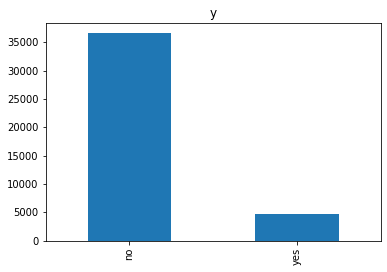

In [15]:
#df['y'].value_counts()
data = df.sort_values(by=['y'])
data['y'].value_counts().plot(kind = 'bar')
plt.title('y')
plt.show()

In [14]:
df['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

### IMPORTANT: not balanced data of target column

In [16]:
# Take sample
df_sample = df.sample(100)
df_sample['y'] = df_sample['y'].apply(lambda x: 1 if x == 'yes' else 0) 
df_sample['y'].value_counts()


0    93
1     7
Name: y, dtype: int64

In [ ]:
#make a l

In [17]:
# Calculate Expected Value (EV), population mean and bias
ev = df_sample.mean()[0]
pop_mean = df.mean()[0]
bias = ev - pop_mean

print('Sample mean (Expected Value): ', ev)
print('Population mean: ', pop_mean)
print('Bias: ', bias)

/tmp/ipykernel_1894/1227502573.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ev = df_sample.mean()[0]


Sample mean (Expected Value):  39.41
Population mean:  40.02380027200311
Bias:  -0.613800272003111


/tmp/ipykernel_1894/1227502573.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop_mean = df.mean()[0]
